In [50]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [51]:
import sys
sys.path.append("/home/paperspace/fastai") # go to parent dir

In [52]:
# This file contains all the main external libs we'll use
from fastai.imports import *
import os
import shutil

In [53]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [62]:
PATH = 'CAX_Superhero_Train'
sz=224
bs=64

In [64]:
os.listdir(PATH)

['.ipynb_checkpoints', 'all', 'valid', 'models', 'train', 'tmp']

In [58]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [59]:
def split_dataset_into_test_and_train_sets(all_data_dir, training_data_dir, testing_data_dir, testing_data_pct):
    # Recreate testing and training directories
    if testing_data_dir.count('/') > 1:
        shutil.rmtree(testing_data_dir, ignore_errors=False)
        os.makedirs(testing_data_dir)
        print("Successfully cleaned directory " + testing_data_dir)
    else:
        print("Refusing to delete testing data directory " + testing_data_dir + " as we prevent you from doing stupid things!")

    if training_data_dir.count('/') > 1:
        shutil.rmtree(training_data_dir, ignore_errors=False)
        os.makedirs(training_data_dir)
        print("Successfully cleaned directory " + training_data_dir)
    else:
        print("Refusing to delete testing data directory " + training_data_dir + " as we prevent you from doing stupid things!")

    num_training_files = 0
    num_testing_files = 0

    for subdir, dirs, files in os.walk(all_data_dir):
        category_name = os.path.basename(subdir)

        # Don't create a subdirectory for the root directory
        print(category_name + " vs " + os.path.basename(all_data_dir))
        if category_name == os.path.basename(all_data_dir):
            continue

        training_data_category_dir = training_data_dir + '/' + category_name
        testing_data_category_dir = testing_data_dir + '/' + category_name

        if not os.path.exists(training_data_category_dir):
            os.mkdir(training_data_category_dir)

        if not os.path.exists(testing_data_category_dir):
            os.mkdir(testing_data_category_dir)

        for file in files:
            input_file = os.path.join(subdir, file)
            if np.random.rand(1) < testing_data_pct:
                shutil.copy(input_file, testing_data_dir + '/' + category_name + '/' + file)
                num_testing_files += 1
            else:
                shutil.copy(input_file, training_data_dir + '/' + category_name + '/' + file)
                num_training_files += 1

    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

In [60]:
split_dataset_into_test_and_train_sets('CAX_Superhero_Train/all/','CAX_Superhero_Train/train','CAX_Superhero_Train/valid',0.2)

Refusing to delete testing data directory CAX_Superhero_Train/valid as we prevent you from doing stupid things!
Refusing to delete testing data directory CAX_Superhero_Train/train as we prevent you from doing stupid things!
 vs 
Catwoman vs 
Avengers vs 
Captain America vs 
Iron Man vs 
Batman vs 
Hulk vs 
Ghost Rider vs 
Superman vs 
Aquaman vs 
Black Panther vs 
Ant-Man vs 
Spiderman vs 
Processed 4323 training files.
Processed 1110 testing files.


In [63]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 18/18 [00:02<00:00,  6.20it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.022402   1.47086    0.539141  
    1      1.606624   1.328962   0.571259                 



[1.3289621, 0.5712594704495536]

In [65]:
learn.fit(0.01, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.303402   1.302672   0.586806  
    1      1.258424   1.240687   0.603299                 
    2      1.236178   1.214159   0.613715                 



[1.2141591, 0.6137152777777778]

In [66]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [67]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [68]:
learn.fit(1e-2, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.043784   1.476273   0.531329  
    1      1.609391   1.299633   0.574021                 



[1.2996333, 0.5740214652485318]

In [69]:
learn.precompute=False

In [70]:
learn.fit(1e-2, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.417149   1.264182   0.590515  



[1.2641822, 0.5905145208040873]

In [71]:
lr=np.array([1e-4,1e-3,1e-2])

In [72]:
learn.fit(lr, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.38238    1.246534   0.608586  



[1.2465342, 0.6085858593384424]

In [73]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.334138   1.225836   0.601641  
    1      1.307224   1.180024   0.635259                 
    2      1.25131    1.168981   0.632576                 
    3      1.246137   1.144275   0.639757                 
    4      1.174807   1.129766   0.638889                 
    5      1.158059   1.111556   0.650016                 
    6      1.130883   1.104753   0.651752                 



[1.1047525, 0.6517518924342262]

In [74]:
learn.fit(lr, 3, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.168133   1.104965   0.64315   
    1      1.126632   1.091421   0.653488                 
    2      1.100158   1.093604   0.65696                  
    3      1.111599   1.073505   0.65696                  
    4      1.062639   1.061605   0.671638                 
    5      1.027679   1.062936   0.668245                 
    6      1.036707   1.060556   0.667535                 
    7      1.048844   1.05606    0.661379                 
    8      1.016788   1.046968   0.676847                 



[1.046968, 0.6768465903070238]

In [75]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 91%|█████████ | 62/68 [00:11<00:01,  5.27it/s, loss=4.13] 

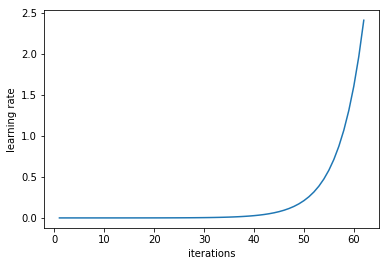

In [76]:
learn.sched.plot_lr()

In [77]:
learn.save('10_3')

In [78]:
learn.load('10_3')

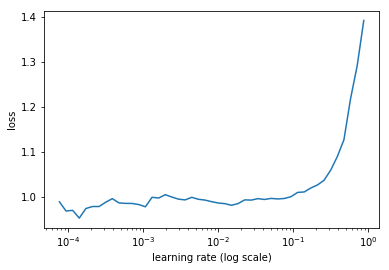

In [79]:
learn.sched.plot()